# Word2Vec

这节通过gensim和pytorch训练日常使用的Word2Vec模型。

## Gensim

In [3]:
import gensim

In [4]:
sentences = [['first', 'sentence'], ['second', 'sentence']]

# train word2vec on the two sentences
model = gensim.models.Word2Vec(sentences, min_count=1) # min_count指定了最小词频阈值（即出现次数少于该值的单词都会被忽略）
model.wv.key_to_index["first"]

2

In [5]:
#词之间的相似度
model.wv.similarity("first", "second")

-0.023671653

### 例子1：gensim训练英文word2vec模型

gensim下的word2vec模型可以继续训练，下面的例子把常用参数写上：

In [9]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

print(common_texts[:200])
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [10]:
model.save("word2vec.model")

#先保存，再继续接力训练
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)
model

In [11]:
vector1 = model.wv["computer"]  # numpy vector of a word
vector1

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428459,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.0044876 ,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811905, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [12]:
sims = model.wv.most_similar("computer", topn=10)  # get other similar words
sims

[('system', 0.21617141366004944),
 ('survey', 0.04468922317028046),
 ('interface', 0.015203384682536125),
 ('time', 0.0019510771380737424),
 ('trees', -0.03284314274787903),
 ('human', -0.07424270361661911),
 ('response', -0.09317589551210403),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513808578252792),
 ('user', -0.16911624372005463)]

仅仅保存模型训练好的词向量键值对，通过 `KeyedVectors` 快速加载到内存，计算词的向量值：

In [13]:
from gensim.models import KeyedVectors
# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector2 = wv["computer"] # Get numpy vector of a word
vector2

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428459,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.0044876 ,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811905, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [14]:
compare = vector1 == vector2
compare.all()

True

向量结果是一样的。

### 例子2：gensim训练中文word2vec模型

In [15]:
txt_path = "data/C000008_test.txt"
sentences = [i.split() for i in open(txt_path, "r", encoding="utf-8").read().split("\n")]
sentences[:2]

[['1,本报记者',
  '发自',
  '上海',
  '国外',
  '媒体',
  '昨日',
  '报道',
  '澳大利亚',
  '银行',
  'acq',
  'arie',
  '预计',
  '推出',
  '中国',
  '人民币',
  '10',
  '亿元',
  '商业',
  '住房',
  '抵押',
  '贷款',
  '资产',
  '证券化',
  '计划',
  '有关部门',
  '批准',
  '将是',
  '海外',
  '资金',
  '首次',
  '此项',
  '计划',
  '市场分析',
  '人士',
  '计划',
  '预计',
  '中国',
  '监管部门',
  '阻力',
  '考虑到',
  '交易',
  '相关',
  '高昂',
  '固定成本',
  '人民币',
  '10',
  '亿元',
  '可能是',
  '最低',
  '金额',
  '银行',
  '原本',
  '计划',
  '2006',
  '年初',
  '中国',
  '推出',
  'macquarie',
  'anda',
  '房地产',
  '投资信托',
  '计划',
  '香港特区',
  '证监会',
  '否决',
  '该银行',
  '中国',
  '房地产投资',
  '基金',
  '首席',
  '投资',
  '执行官',
  '此前',
  '开发商',
  '行列',
  '竟是',
  '金融机构',
  '项目',
  '投融资',
  '资本运作',
  '才是',
  '特长'],
 ['2,复旦',
  '新浪',
  '本报记者',
  '杨国强',
  '1984年',
  '相貌端正',
  '复旦大学',
  '新闻系',
  '大学',
  '同学',
  '回忆说',
  '内向',
  '做事',
  '很有',
  '生活',
  '学习',
  '很有',
  '计划性',
  '大学毕业',
  '上海',
  '电视台',
  '当了',
  '两年',
  '记者',
  '赴美',
  '求学',
  '先在',
  '奥克拉荷',
  '大学',
  '拿了',
  '新闻学',
  '硕士',
  '再到',
  '德州',


In [16]:
import gensim.models


model = gensim.models.Word2Vec(sentences=sentences, vector_size=50, window=5, min_count=1, workers=4)
model.save("C000008_word2vec.model")
model.wv.key_to_index

{'新浪': 0,
 '中国': 1,
 '化妆品': 2,
 '美国': 3,
 '广告': 4,
 '碎片': 5,
 '计划': 6,
 '地球': 7,
 '销售': 8,
 '上市': 9,
 '5月': 10,
 '科学家': 11,
 '皮肤': 12,
 '改善': 13,
 '大学': 14,
 '的产品': 15,
 '市场': 16,
 '彗星': 17,
 '财务': 18,
 '预计': 19,
 '参与': 20,
 '网站': 21,
 '兼任': 22,
 '提供': 23,
 '瓦斯': 24,
 '高科技公司': 25,
 '73p': 26,
 '负责': 27,
 '植物': 28,
 '拿了': 29,
 '2005年': 30,
 '1999': 31,
 '距离': 32,
 '硕士': 33,
 '首席': 34,
 '2000': 35,
 '年度': 36,
 '10': 37,
 '报道': 38,
 '银行': 39,
 '担任': 40,
 '推出': 41,
 '便宜': 42,
 '之间': 43,
 '人民币': 44,
 '2005': 45,
 '亿元': 46,
 '商业': 47,
 '推动': 48,
 'cfo': 49,
 '12日': 50,
 '宇航局': 51,
 '互联网': 52,
 '海外': 53,
 '上海': 54,
 '首次': 55,
 '很有': 56,
 '3号': 57,
 '德州': 58,
 '奥斯汀': 59,
 '再到': 60,
 '赴美': 61,
 '新闻学': 62,
 '奥克拉荷': 63,
 '电视台': 64,
 '先在': 65,
 '求学': 66,
 '当了': 67,
 '两年': 68,
 '记者': 69,
 '那一': 70,
 '专业': 71,
 '副总裁': 72,
 '照搬': 73,
 '变了': 74,
 '2001': 75,
 '2001年': 76,
 '借鉴': 77,
 '中国概念股': 78,
 '余家': 79,
 '结构': 80,
 '公司': 81,
 '设计': 82,
 '运作': 83,
 '加盟': 84,
 '身份': 85,
 '多家': 86,
 '转入': 87,
 '在此期间'

In [18]:
#key index
print(model.wv.key_to_index["中国"])
print(model.wv.key_to_index["澳大利亚"])

#word vector
print(model.wv["中国"])
print(model.wv["澳大利亚"])

#word similarity
print(model.wv.similarity("中国", "澳大利亚"))

1
131
[-0.01635404  0.00892375 -0.00824884  0.00170715  0.01705568 -0.00899646
  0.00914393 -0.01339554 -0.00736877  0.01885619 -0.00314003  0.0005598
 -0.00817219 -0.01527858 -0.0030647   0.00505625 -0.00163121  0.01093926
 -0.00567137  0.00446063  0.01084758  0.01680044 -0.00283044 -0.018494
  0.00881959  0.00127615  0.01478992 -0.00165017 -0.00545879 -0.01751602
 -0.00163091  0.00587184  0.01071152  0.01424571 -0.01153169  0.00400406
  0.01238476 -0.00952362 -0.00622743  0.01345337  0.00357411  0.00042622
  0.00689636  0.0005763   0.01942016  0.0100719  -0.01777284 -0.01420312
  0.00203524  0.01278464]
[-0.00724434  0.00724444 -0.00516048 -0.00945491 -0.00724321 -0.01235146
  0.00705467 -0.01544216 -0.01511148 -0.00901232  0.01482126  0.00356373
  0.01094765  0.01646764 -0.01249899 -0.00918809  0.01543008  0.00986083
  0.00925157  0.01797456  0.01754135 -0.00537365  0.0021023   0.01097721
  0.01779929  0.01981683 -0.01665249 -0.0102626   0.00993186  0.00185638
  0.00029913  0.015080

## PyTorch

演示使用pytorch训练skip-gram的word2vec模型，比上一节的论文实现简化一些。

In [20]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch
import numpy as np
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"  # 为了解决在jupyter notebook中使用matplotlib绘图时报错OSError: [Errno 24] Too many open files

def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(
        range(len(skip_grams)), batch_size, replace=False
    )

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]]) # target, one hot编码
        random_labels.append(skip_grams[i][1]) # context word

    return random_inputs, random_labels

class Word2Vec(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.W = nn.Linear(voc_size, embedding_size, bias=False)
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, X):
        hidden_layer = self.W(X)
        output_layer = self.WT(hidden_layer)
        return output_layer

/var/folders/jx/hsm21jg10x574b3w9kt9p29w0000gn/T/ipykernel_8952/3464223725.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:277.)
  input_batch = torch.Tensor(input_batch)


Epoch: 1000, Loss: 1.787408
Epoch: 2000, Loss: 0.707719
Epoch: 3000, Loss: 1.151599
Epoch: 4000, Loss: 1.540760
Epoch: 5000, Loss: 1.050446


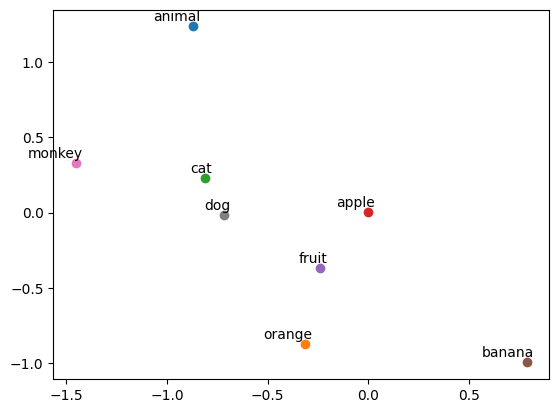

In [24]:
batch_size = 2
embedding_size = 10

sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit", "dog cat animal", "cat monkey animal", "monkey dog animal"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)} #word_to_index
voc_size = len(word_dict) #number of words

# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
    for w in context:
        skip_grams.append([target, w])

model = Word2Vec()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(5000):
    input_batch, target_batch = random_batch()
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    loss = criterion(output, target_batch) #output: [batch_size, voc_size], target_batch: [batch_size] 表示context word的index
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1:04d}, Loss: {loss.item():.6f}")

    loss.backward()
    optimizer.step()

for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = float(W[0][i]), float(W[1][i])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
plt.show()

In [27]:
import os
os.remove('word2vec.model')
os.remove('word2vec.wordvectors')
os.remove('C000008_word2vec.model')